In [1]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import pandas_to_pybeh as pb
from cmlreaders import CMLReader, get_data_index
from plotting import *

In [2]:
def is_number(x):
    for i in x:
        if i.isdigit():
            continue
        else:
            return np.nan
    return x

In [4]:
df = pd.read_csv("CVLT_w_age.csv")
df['Subject'] = df['Subject Number']
df['Age'] = df['Age at Implant (calculated)']
print(df.columns)
df['CVLT total recall'] = df['Total Learning Lists 1-5']
beh = df.drop(['Subject Number', 'Event Name', 'Short Delay Free Recall', 'Long Delay Free Recall', 'Total Learning Lists 1-5', 'Short Delay Free Recall.1', 
               'Long Delay Free Recall.1', 'Total Learning Lists 1-5 (T-score)', 'Age at Implant (calculated)'], axis = 1)

beh = beh.loc[beh['Subject']!= 578]
cvl = beh.dropna(0, 'all')
cvl.dropna(subset=['CVLT total recall'],inplace=True)
# beh.count()
cvl['CVLT total recall'] = cvl['CVLT total recall'].apply(is_number).astype(float)

Index(['Subject Number', 'Event Name', 'Short Delay Free Recall',
       'Long Delay Free Recall', 'Total Learning Lists 1-5',
       'Short Delay Free Recall.1', 'Long Delay Free Recall.1',
       'Total Learning Lists 1-5 (T-score)', 'Age at Implant (calculated)',
       'Subject', 'Age'],
      dtype='object')


In [6]:
zscore = cvl.copy()
zscore.set_index('Subject',inplace=True)
zscore['CVLT total recall'] = zscore['CVLT total recall']/80

In [15]:
meta=[53.49,5.81] # From metanorms cited in paper
cvl['zscore'] = (cvl['CVLT total recall'] - meta[0])/meta[1]
print(cvl['zscore'])

0     -3.010327
1     -0.256454
2     -0.428571
3      0.087780
4      1.981067
         ...   
187   -0.600688
188   -0.256454
189   -5.592083
190   -4.215146
191   -0.772806
Name: zscore, Length: 164, dtype: float64


In [16]:
zscore_mean = cvl['zscore'].mean()
zscore_std = cvl.zscore.std()
n = cvl.shape[0]
print(zscore_mean, zscore_std, n)
np.save('cvlhospitalzscore', [zscore_mean, zscore_std, n])

-1.235304055837724 1.9862878898085317 164


r(158) = -0.09897513761850191, p = 0.21306150515484693


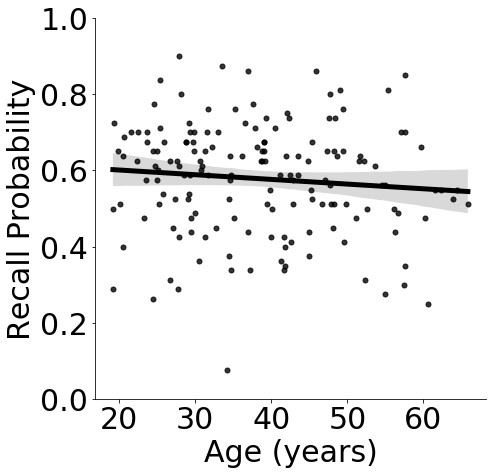

In [17]:
set_axes(fontsize=30, ylim = [0,1])

sns.regplot(data=zscore, x='Age', y = 'CVLT total recall', color = 'black', scatter_kws=dict(s = 25), line_kws=dict(linewidth=5))
zscore.dropna(inplace=True)
n=zscore.shape[0]
r,p = scipy.stats.pearsonr(zscore['Age'], zscore['CVLT total recall'])
_=plt.xlabel('Age (years)')
_=plt.ylabel('Recall Probability')
print('r({}) = {}, p = {}'.format(n-2,r,p))
plt.savefig('CVLT_age.pdf', bbox_inches='tight')

In [18]:
np.save('CVLTvAge', [r,n])